<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Laboratorios/Laboratorio_2/MINE_4206_202510_AML_Lab2_S2_EDA_Extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

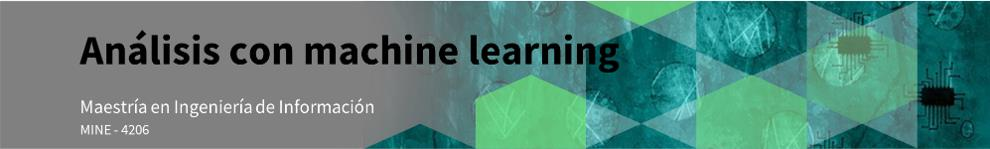

#Tabla de contenido

[Contexto y objetivos.](scrollTo=opGTmPf8s2Fw)<br>
[Entendimiento del negocio.](#scrollTo=mvUzsZbk4y-4)<br>
[0. Instalación de librerías.](#scrollTo=gjQDyeHN5Lib)<br>
[1. Importar librerías](#scrollTo=KXlOoHGx6Fdz)<br>
[2. Introducción a los datos.](#scrollTo=6OKhZATq6Jlt)<br>
[3. Modelamiento.](#scrollTo=fy59XxXphe_L)<br>
[4. Preguntas.](#scrollTo=npdolSB5h7np)<br>


---
# Contexto y objetivos.



**Objetivos:**

* Resolver un problema de Aprendizaje de Datos.
* Revisar los conceptos básicos de una clasificación.
* Comprender el comportamiento de los clientes e identificar oportunidades de mejora.

La fuente de los datos la puedes encontrar en [Lego dataset](https://www.kaggle.com/datasets/maggieakarn/lego-dataset).



# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **set_id** | Identificador único de cada set de lego.|
| **name** | Nombre del set de lego.|
| **year** | Año de lanzamiento.|
| **theme** | Tema principal del set (p.e., Star Wars, City, Technic).|
| **subtheme** | Subcategoría del tema principal.|
| **themeGroup** | Clasificación temática de nivel superior.|
| **category** | Tipo del set de lego (p.e., Brick Set, Minifigure Set). |
| **pieces** | Número de piezas en el set.|
| **minifigs** | Minifiguras del set.|
| **agerange_min** | Edad mímina recomendada para usar el set.|
| **US_retailPrice** | Precio de venta en dolares (USD).|
| **bricksetURL** | Link a la imagen de las fichas o piezas.|
| **thumbnailURL** | Link de previsualización del set.|
| **imageURL** | Link a la imagen del set.|

---
# 0. Instalación de librerías.

Análisis profundo de datos

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=af45f9936f61814a81ccc39318d6a0b9d46d93f0c52e848e75b5291cfb982ca7
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Entendiendo que la organización publicó la información en kaggle, requerimos hacer uso de la librería para acceder a la información.

In [ ]:
!pip install kaggle

---
# 1. Importar librerías

In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.svm import SVC

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, roc_auc_score

import scipy.stats as stats

#Librerías extras
import itertools

from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.6.1


---
# 2. Introducción a los datos.

##2.1. Parámetros generales y carga de la información.

In [ ]:
#Porcentaje para validación y test
test_val_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 19

## 2.2. Configuración del entorno de kaggle.

La información se encuentra dispuesta en la plataforma kaggle. Para asegurar el acceso a los datos de forma automatizada en el notebook, vamos a importar la librería e iniciar las acciones que permitan conectarnos con el repositorio. Previamente deberás generar el archivo JSON con las opciones del [API](https://www.kaggle.com/settings).

Para la ejecución correcta del notebook, deberás cargar el archivo de las credenciales, e iniciar el proceso de preparación, el cuál consiste en verificar permisos del archivo, existencia del mismo, preparar una carpeta específica con nombre kaggle para llevar allí una copia del archivo de credenciales y asegurar los permisos de acceso.

Preparar el archivo de kaggle para la descarga

In [ ]:
!ls -lha kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 Feb 17 21:59 kaggle.json


Con miras a estar seguros de lograr la conexión con kaggle, ejecutamos el comando que permite ver una pre-visualización de datasets publicados en el repositorio.

In [ ]:
!kaggle datasets list

ref                                                               title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                          Car Price Dataset                            135KB  2025-01-26 19:53:28          11436        163  1.0              
adilshamim8/education-and-career-success                          Education & Career Success.                  118KB  2025-02-03 05:24:20           2531         45  1.0              
anandshaw2001/netflix-movies-and-tv-shows                         Netflix Movies and TV Shows                    1MB  2025-01-03 10:33:01          19556        487  1.0              
hubertsidorowicz/football-players-stats-2024-2025                 Football Players St

Cada dataset está compuesto por un nombre asignado y el autor, en este caso nos apoyamos nuevamente del comando kaggle por comando y asegurará la descarga de la información siempre y cuándo cuente con un valor válido.

In [ ]:
!kaggle datasets download maggieakarn/lego-dataset

Dataset URL: https://www.kaggle.com/datasets/maggieakarn/lego-dataset
License(s): other
  0% 0.00/527k [00:00<?, ?B/s]
100% 527k/527k [00:00<00:00, 57.0MB/s]


Observa la información anterior, tenemos los datos de los porcentajes de descarga, pero también el nombre del archivo que ha sido descargado y la ruta destino (content).

La información descargada en formato zip, cuenta con un archivo csv en su interior, si vieramos de forma gráfica su estructura, sería la siguiente:

```python
lego-dataset.zip/
  lego_sets.csv
```

Teniendo en cuenta lo anterior, vamos a descomprimir la información, es necesario crear un un directorio para que el contenido del archivo zip, se encuentre allí. Para este propósito, vamos a crear unas variables de manejo de archivos:

In [ ]:
ROOT_DIR = '/content'
DATASET_NAME = 'lego-dataset'
DATASET_FILE = "lego_sets.csv"

El propósito es obtener el archivo con los datos, no obstante, se encuentra de un archivo zip, vamos a generar una previsualización de lo que sería un comando que descomprime la información del archivo zip:

In [ ]:
print(f"!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}")

!unzip lego-dataset.zip -d /content/lego-dataset


Al estar seguro del comando anterior, genero un bloque de comandos que asegurarán la descompresión del archivo, ubicándonos en la raiz, creado una carpeta cuyo nombre corresponderá al dataset y por último el comando del bloque anterior:

In [ ]:
%cd {ROOT_DIR}
!mkdir /{DATASET_NAME}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  lego-dataset.zip
  inflating: /content/lego-dataset/lego_sets.csv  


Vamos a almacenar en la variable `DATA_DIR` la información de la ruta del archivo dónde se encuentra el archivo csv.

In [ ]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}/{DATASET_FILE}"
print(DATA_DIR)

/content/lego-dataset/lego_sets.csv


Ahora ya es posible importar la información en un pandas dataframe:

In [ ]:
data_df = pd.read_csv(DATA_DIR)

Generamos una previsualización de la información:

In [ ]:
data_df.head()

set_id                     name  year      theme     subtheme themeGroup  \
0    1-8          Small house set  1970  Minitalia          NaN    Vintage   
1    2-8         Medium house set  1970  Minitalia          NaN    Vintage   
2    3-6         Medium house set  1970  Minitalia          NaN    Vintage   
3    4-4          Large house set  1970  Minitalia          NaN    Vintage   
4    4-6  Mini House and Vehicles  1970  Samsonite  Model Maker    Vintage   

  category  pieces  minifigs  agerange_min  US_retailPrice  \
0   Normal    67.0       NaN           NaN             NaN   
1   Normal   109.0       NaN           NaN             NaN   
2   Normal   158.0       NaN           NaN             NaN   
3   Normal   233.0       NaN           NaN             NaN   
4   Normal     NaN       NaN           NaN             NaN   

                     bricksetURL  \
0  https://brickset.com/sets/1-8   
1  https://brickset.com/sets/2-8   
2  https://brickset.com/sets/3-6   
3  https://brickset.com/sets/4-4   
4  https://brickset.com/sets/4-6   

                                     thumbnailURL  \
0  https://images.brickset.com/sets/small/1-8.jpg   
1  https://images.brickset.com/sets/small/2-8.jpg   
2  https://images.brickset.com/sets/small/3-6.jpg   
3  https://images.brickset.com/sets/small/4-4.jpg   
4                                             NaN   

                                          imageURL  
0  https://images.brickset.com/sets/images/1-8.jpg  
1  https://images.brickset.com/sets/images/2-8.jpg  
2  https://images.brickset.com/sets/images/3-6.jpg  
3  https://images.brickset.com/sets/images/4-4.jpg  
4                                              NaN

Vamos a verificar las características principales del pandas dataframe:

Tipos de dato:

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   set_id          18457 non-null  object 
 1   name            18457 non-null  object 
 2   year            18457 non-null  int64  
 3   theme           18457 non-null  object 
 4   subtheme        14901 non-null  object 
 5   themeGroup      18455 non-null  object 
 6   category        18457 non-null  object 
 7   pieces          14533 non-null  float64
 8   minifigs        8399 non-null   float64
 9   agerange_min    6787 non-null   float64
 10  US_retailPrice  6982 non-null   float64
 11  bricksetURL     18457 non-null  object 
 12  thumbnailURL    17451 non-null  object 
 13  imageURL        17451 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.0+ MB


Información de variables numéricas:

In [ ]:
data_df.describe()

year        pieces     minifigs  agerange_min  US_retailPrice
count  18457.000000  14533.000000  8399.000000   6787.000000     6982.000000
mean    2007.960611    226.473749     2.663650      6.637542       37.534817
std       11.948666    469.988785     2.897857      2.780091       54.382712
min     1970.000000      0.000000     1.000000      1.000000        1.490000
25%     2001.000000     23.000000     1.000000      5.000000        9.990000
50%     2011.000000     70.000000     2.000000      6.000000       19.990000
75%     2017.000000    242.000000     3.000000      8.000000       39.990000
max     2022.000000  11695.000000    80.000000     18.000000      849.990000

Verificamos el número de instancias y características:

In [ ]:
print(f"Dimensión: El número de instancias es: {data_df.shape[0]:,}, el número de características (features) es: {data_df.shape[1]}")

Dimensión: El número de instancias es: 18,457, el número de características (features) es: 14


Total de datos duplicados:

In [ ]:
data_df.duplicated().sum()

0

Podemos revisar si hay datos nulos cuya cantidad es conslidada por cada una de las columnas:

In [ ]:
data_df.isna().sum()

set_id                0
name                  0
year                  0
theme                 0
subtheme           3556
themeGroup            2
category              0
pieces             3924
minifigs          10058
agerange_min      11670
US_retailPrice    11475
bricksetURL           0
thumbnailURL       1006
imageURL           1006
dtype: int64

## 2.3. Separación de la información.

### 2.3.1. Entrenamiento y test.

Definimos la variable objetivo:

In [ ]:
target_feature = 'category'

Separamos los datos de entrenamiento y test (20%), junto con el parámetro de reproducibilidad o semilla (`random_state`):

In [ ]:
train, test = train_test_split(data_df, test_size=test_val_alpha, random_state=my_seed)
train.head()

set_id                                name  year    theme  \
13256    30425-1       CRU Master's Training Grounds  2017  Ninjago   
13039  5005018-1                Luke Skywalker Watch  2016     Gear   
10915    41037-1             Stephanie's Beach House  2014  Friends   
14914    30328-5           Town Rescue - Policewoman  2019    Duplo   
14690  5005404-1  The LEGO Ninjago Movie Sorting Box  2018     Gear   

             subtheme        themeGroup category  pieces  minifigs  \
13256         General  Action/Adventure   Normal    43.0       2.0   
13039  Watches/Clocks     Miscellaneous     Gear     NaN       NaN   
10915           Beach        Modern day   Normal   369.0       2.0   
14914             NaN        Pre-school   Normal     NaN       NaN   
14690         Storage     Miscellaneous     Gear     NaN       NaN   

       agerange_min  US_retailPrice                          bricksetURL  \
13256           6.0             NaN    https://brickset.com/sets/30425-1   
13039           NaN             NaN  https://brickset.com/sets/5005018-1   
10915           6.0           39.99    https://brickset.com/sets/41037-1   
14914           NaN             NaN    https://brickset.com/sets/30328-5   
14690           NaN           14.99  https://brickset.com/sets/5005404-1   

                                            thumbnailURL  \
13256  https://images.brickset.com/sets/small/30425-1...   
13039  https://images.brickset.com/sets/small/5005018...   
10915  https://images.brickset.com/sets/small/41037-1...   
14914  https://images.brickset.com/sets/small/30328-5...   
14690  https://images.brickset.com/sets/small/5005404...   

                                                imageURL  
13256  https://images.brickset.com/sets/images/30425-...  
13039  https://images.brickset.com/sets/images/500501...  
10915  https://images.brickset.com/sets/images/41037-...  
14914  https://images.brickset.com/sets/images/30328-...  
14690  https://images.brickset.com/sets/images/500540...

### 2.3.2. Validación.

In [ ]:
new_train, val = train_test_split(train, test_size=test_val_alpha, random_state=my_seed)
new_train.head()

set_id                       name  year             theme  \
16720   40499-1             Santa's Sleigh  2021          Seasonal   
2771     4022-1             C26 Sea Cutter  1996             Boats   
15260   75245-1  Star Wars Advent Calendar  2019         Star Wars   
10356   70200-1                  CHI Laval  2013  Legends of Chima   
5553   LMG005-1                       Deer  2003       Promotional   

                subtheme        themeGroup category  pieces  minifigs  \
16720          Christmas     Miscellaneous   Normal   343.0       1.0   
2771                 NaN        Modern day   Normal   193.0       3.0   
15260           Seasonal          Licensed   Normal   280.0       9.0   
10356  Buildable Figures  Action/Adventure   Normal    55.0       NaN   
5553       Miscellaneous     Miscellaneous    Other    12.0       NaN   

       agerange_min  US_retailPrice                         bricksetURL  \
16720           9.0           39.99   https://brickset.com/sets/40499-1   
2771            7.0             NaN    https://brickset.com/sets/4022-1   
15260           NaN           39.99   https://brickset.com/sets/75245-1   
10356           6.0           14.99   https://brickset.com/sets/70200-1   
5553            NaN             NaN  https://brickset.com/sets/LMG005-1   

                                            thumbnailURL  \
16720  https://images.brickset.com/sets/small/40499-1...   
2771   https://images.brickset.com/sets/small/4022-1.jpg   
15260  https://images.brickset.com/sets/small/75245-1...   
10356  https://images.brickset.com/sets/small/70200-1...   
5553                                                 NaN   

                                                imageURL  
16720  https://images.brickset.com/sets/images/40499-...  
2771   https://images.brickset.com/sets/images/4022-1...  
15260  https://images.brickset.com/sets/images/75245-...  
10356  https://images.brickset.com/sets/images/70200-...  
5553                                                 NaN

Demos un vistazo al número de instancias para cada uno de los conjuntos de datos:

In [ ]:
train_count = new_train.shape[0]
val_count = val.shape[0]
test_count = test.shape[0]

print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print(f"-> Train: {train_count:,}")
print(f"-> Validation: {val_count:,}")
print(f"-> Test: {test_count:,}")

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
-> Train: 11,812
-> Validation: 2,953
-> Test: 3,692


Verifiquemos cómo se comportan las ausencias en el conjunto de entrenamiento y validación:

In [ ]:
print(round(100*(new_train.isnull().sum()/len(new_train.index)), 2))
print(len(new_train.columns))

set_id             0.00
name               0.00
year               0.00
theme              0.00
subtheme          19.58
themeGroup         0.00
category           0.00
pieces            21.36
minifigs          54.64
agerange_min      63.52
US_retailPrice    62.24
bricksetURL        0.00
thumbnailURL       5.40
imageURL           5.40
dtype: float64
14


In [ ]:
print(round(100*(val.isnull().sum()/len(val.index)), 2))
print(len(val.columns))

set_id             0.00
name               0.00
year               0.00
theme              0.00
subtheme          18.56
themeGroup         0.03
category           0.00
pieces            21.98
minifigs          53.78
agerange_min      61.77
US_retailPrice    61.02
bricksetURL        0.00
thumbnailURL       5.82
imageURL           5.82
dtype: float64
14


## 2.4. Exploración de los datos.

In [ ]:
ProfileReport(new_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
new_train_ = new_train.copy()
new_train_["US_retailPrice"] = new_train_["US_retailPrice"].fillna(0)
new_train_

set_id                       name  year                    theme  \
16720    40499-1             Santa's Sleigh  2021                 Seasonal   
2771      4022-1             C26 Sea Cutter  1996                    Boats   
15260    75245-1  Star Wars Advent Calendar  2019                Star Wars   
10356    70200-1                  CHI Laval  2013         Legends of Chima   
5553    LMG005-1                       Deer  2003              Promotional   
...          ...                        ...   ...                      ...   
14924    30393-1      Steve and Creeper Set  2019                Minecraft   
4916      5434-1  LEGO Baby Stack 'n' Learn  2002                  Explore   
6623      9842-1    Interactive Servo Motor  2006               Mindstorms   
13581   71018-16                 Highwayman  2017  Collectable Minifigures   
6329   4277206-1          Letters & Keyring  2005                  Clikits   

                subtheme        themeGroup  category  pieces  minifigs  \
16720          Christmas     Miscellaneous    Normal   343.0       1.0   
2771                 NaN        Modern day    Normal   193.0       3.0   
15260           Seasonal          Licensed    Normal   280.0       9.0   
10356  Buildable Figures  Action/Adventure    Normal    55.0       NaN   
5553       Miscellaneous     Miscellaneous     Other    12.0       NaN   
...                  ...               ...       ...     ...       ...   
14924      Minifig-scale          Licensed    Normal    36.0       2.0   
4916            Being Me        Pre-school    Normal    36.0       2.0   
6623                 NXT         Technical    Normal     1.0       NaN   
13581          Series 17     Miscellaneous    Normal     8.0       1.0   
6329                 NaN             Girls  Extended    70.0       NaN   

       agerange_min  US_retailPrice                          bricksetURL  \
16720           9.0           39.99    https://brickset.com/sets/40499-1   
2771            7.0            0.00     https://brickset.com/sets/4022-1   
15260           NaN           39.99    https://brickset.com/sets/75245-1   
10356           6.0           14.99    https://brickset.com/sets/70200-1   
5553            NaN            0.00   https://brickset.com/sets/LMG005-1   
...             ...             ...                                  ...   
14924           NaN            0.00    https://brickset.com/sets/30393-1   
4916            NaN            0.00     https://brickset.com/sets/5434-1   
6623            NaN           24.99     https://brickset.com/sets/9842-1   
13581           5.0            3.99   https://brickset.com/sets/71018-16   
6329            6.0            0.00  https://brickset.com/sets/4277206-1   

                                            thumbnailURL  \
16720  https://images.brickset.com/sets/small/40499-1...   
2771   https://images.brickset.com/sets/small/4022-1.jpg   
15260  https://images.brickset.com/sets/small/75245-1...   
10356  https://images.brickset.com/sets/small/70200-1...   
5553                                                 NaN   
...                                                  ...   
14924  https://images.brickset.com/sets/small/30393-1...   
4916   https://images.brickset.com/sets/small/5434-1.jpg   
6623   https://images.brickset.com/sets/small/9842-1.jpg   
13581  https://images.brickset.com/sets/small/71018-1...   
6329                                                 NaN   

                                                imageURL  
16720  https://images.brickset.com/sets/images/40499-...  
2771   https://images.brickset.com/sets/images/4022-1...  
15260  https://images.brickset.com/sets/images/75245-...  
10356  https://images.brickset.com/sets/images/70200-...  
5553                                                 NaN  
...                                                  ...  
14924  https://images.brickset.com/sets/images/30393-...  
4916   https://images.brickset.com/sets/images/5434-1...  
6623   https://imag

In [ ]:
pd.Series(new_train[target_feature])

16720      Normal
2771       Normal
15260      Normal
10356      Normal
5553        Other
           ...   
14924      Normal
4916       Normal
6623       Normal
13581      Normal
6329     Extended
Name: category, Length: 11812, dtype: object

<ipython-input-28-7e2af3119fef>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp1.set_xticklabels(bp1.get_xticklabels(), rotation=45, horizontalalignment='right')


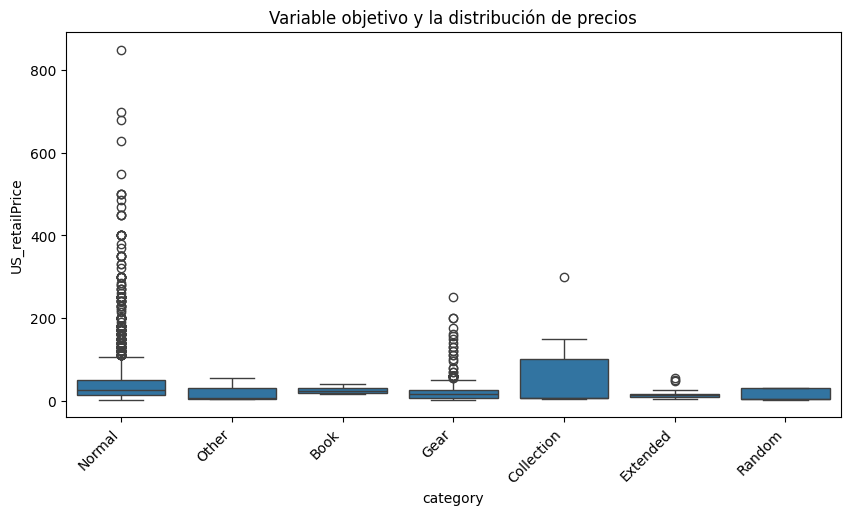

In [ ]:
plt.figure(figsize=(10, 5))
bp1 = sns.boxplot(x=target_feature, y="US_retailPrice", data=new_train)
bp1.set_xticklabels(bp1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Variable objetivo y la distribución de precios")

plt.show()

<ipython-input-29-16153ff2bef7>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s2.set_xticklabels(s2.get_xticklabels(),rotation=15)


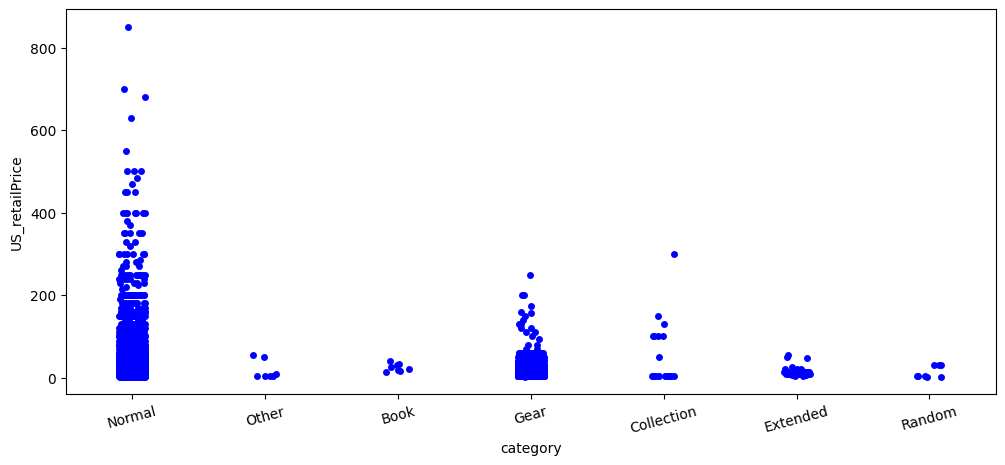

In [ ]:
plt.figure(figsize=(12, 5))
s2=sns.stripplot(x=target_feature, y="US_retailPrice", data=new_train, jitter=True, color="blue")
s2.set_xticklabels(s2.get_xticklabels(),rotation=15)
plt.show()

In [ ]:
new_train_ = new_train.copy()
new_train_["hasPrice"] = np.where(new_train_["US_retailPrice"].isnull(), "No", "Yes")
new_train_

set_id                       name  year                    theme  \
16720    40499-1             Santa's Sleigh  2021                 Seasonal   
2771      4022-1             C26 Sea Cutter  1996                    Boats   
15260    75245-1  Star Wars Advent Calendar  2019                Star Wars   
10356    70200-1                  CHI Laval  2013         Legends of Chima   
5553    LMG005-1                       Deer  2003              Promotional   
...          ...                        ...   ...                      ...   
14924    30393-1      Steve and Creeper Set  2019                Minecraft   
4916      5434-1  LEGO Baby Stack 'n' Learn  2002                  Explore   
6623      9842-1    Interactive Servo Motor  2006               Mindstorms   
13581   71018-16                 Highwayman  2017  Collectable Minifigures   
6329   4277206-1          Letters & Keyring  2005                  Clikits   

                subtheme        themeGroup  category  pieces  minifigs  \
16720          Christmas     Miscellaneous    Normal   343.0       1.0   
2771                 NaN        Modern day    Normal   193.0       3.0   
15260           Seasonal          Licensed    Normal   280.0       9.0   
10356  Buildable Figures  Action/Adventure    Normal    55.0       NaN   
5553       Miscellaneous     Miscellaneous     Other    12.0       NaN   
...                  ...               ...       ...     ...       ...   
14924      Minifig-scale          Licensed    Normal    36.0       2.0   
4916            Being Me        Pre-school    Normal    36.0       2.0   
6623                 NXT         Technical    Normal     1.0       NaN   
13581          Series 17     Miscellaneous    Normal     8.0       1.0   
6329                 NaN             Girls  Extended    70.0       NaN   

       agerange_min  US_retailPrice                          bricksetURL  \
16720           9.0           39.99    https://brickset.com/sets/40499-1   
2771            7.0             NaN     https://brickset.com/sets/4022-1   
15260           NaN           39.99    https://brickset.com/sets/75245-1   
10356           6.0           14.99    https://brickset.com/sets/70200-1   
5553            NaN             NaN   https://brickset.com/sets/LMG005-1   
...             ...             ...                                  ...   
14924           NaN             NaN    https://brickset.com/sets/30393-1   
4916            NaN             NaN     https://brickset.com/sets/5434-1   
6623            NaN           24.99     https://brickset.com/sets/9842-1   
13581           5.0            3.99   https://brickset.com/sets/71018-16   
6329            6.0             NaN  https://brickset.com/sets/4277206-1   

                                            thumbnailURL  \
16720  https://images.brickset.com/sets/small/40499-1...   
2771   https://images.brickset.com/sets/small/4022-1.jpg   
15260  https://images.brickset.com/sets/small/75245-1...   
10356  https://images.brickset.com/sets/small/70200-1...   
5553                                                 NaN   
...                                                  ...   
14924  https://images.brickset.com/sets/small/30393-1...   
4916   https://images.brickset.com/sets/small/5434-1.jpg   
6623   https://images.brickset.com/sets/small/9842-1.jpg   
13581  https://images.brickset.com/sets/small/71018-1...   
6329                                                 NaN   

                                                imageURL hasPrice  
16720  https://images.brickset.com/sets/images/40499-...      Yes  
2771   https://images.brickset.com/sets/images/4022-1...       No  
15260  https://images.brickset.com/sets/images/75245-...      Yes  
10356  https://images.brickset.com/sets/images/70200-...      Yes  
5553                                                 NaN       No  
...                                                  ...      ...  
14924  https://images.brickset.com/sets/images/30393-...       No  
4916  

<ipython-input-31-27109813b1f6>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s1.set_xticklabels(s1.get_xticklabels(),rotation=45)


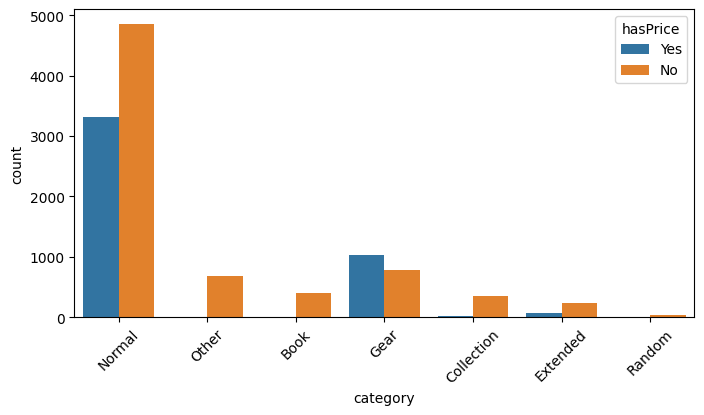

In [ ]:
plt.figure(figsize=(8, 4))
s1=sns.countplot(new_train_, x=target_feature, hue='hasPrice')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Tenemos la certeza que el precio no va a aportar al clasificador dada la cantidad de ausencias superior al 62%, por esta razón no haremos uso de esta variable.

Las direcciones url tienen ausencias considerables, podríamos revisar una por una para conocer si la ruta es válida, no obstante, vamos a asumir que si son válidas, pero podríamos simplicar un poco más para el clasificador, veamos el comportamiento para la variable objetivo en cada uno de los 3 casos y la presencia o no de la url en cada variable:

In [ ]:
new_train_ = new_train.copy()
new_train_["thumbnailURL"] = np.where(new_train_["thumbnailURL"].isnull(), "No", "Yes")
new_train_["bricksetURL"] = np.where(new_train_["bricksetURL"].isnull(), "No", "Yes")
new_train_["imageURL"] = np.where(new_train_["imageURL"].isnull(), "No", "Yes")
new_train_

set_id                       name  year                    theme  \
16720    40499-1             Santa's Sleigh  2021                 Seasonal   
2771      4022-1             C26 Sea Cutter  1996                    Boats   
15260    75245-1  Star Wars Advent Calendar  2019                Star Wars   
10356    70200-1                  CHI Laval  2013         Legends of Chima   
5553    LMG005-1                       Deer  2003              Promotional   
...          ...                        ...   ...                      ...   
14924    30393-1      Steve and Creeper Set  2019                Minecraft   
4916      5434-1  LEGO Baby Stack 'n' Learn  2002                  Explore   
6623      9842-1    Interactive Servo Motor  2006               Mindstorms   
13581   71018-16                 Highwayman  2017  Collectable Minifigures   
6329   4277206-1          Letters & Keyring  2005                  Clikits   

                subtheme        themeGroup  category  pieces  minifigs  \
16720          Christmas     Miscellaneous    Normal   343.0       1.0   
2771                 NaN        Modern day    Normal   193.0       3.0   
15260           Seasonal          Licensed    Normal   280.0       9.0   
10356  Buildable Figures  Action/Adventure    Normal    55.0       NaN   
5553       Miscellaneous     Miscellaneous     Other    12.0       NaN   
...                  ...               ...       ...     ...       ...   
14924      Minifig-scale          Licensed    Normal    36.0       2.0   
4916            Being Me        Pre-school    Normal    36.0       2.0   
6623                 NXT         Technical    Normal     1.0       NaN   
13581          Series 17     Miscellaneous    Normal     8.0       1.0   
6329                 NaN             Girls  Extended    70.0       NaN   

       agerange_min  US_retailPrice bricksetURL thumbnailURL imageURL  
16720           9.0           39.99         Yes          Yes      Yes  
2771            7.0             NaN         Yes          Yes      Yes  
15260           NaN           39.99         Yes          Yes      Yes  
10356           6.0           14.99         Yes          Yes      Yes  
5553            NaN             NaN         Yes           No       No  
...             ...             ...         ...          ...      ...  
14924           NaN             NaN         Yes          Yes      Yes  
4916            NaN             NaN         Yes          Yes      Yes  
6623            NaN           24.99         Yes          Yes      Yes  
13581           5.0            3.99         Yes          Yes      Yes  
6329            6.0             NaN         Yes           No       No  

[11812 rows x 14 columns]

<ipython-input-33-f642b4aa0aae>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s1.set_xticklabels(s1.get_xticklabels(),rotation=45)


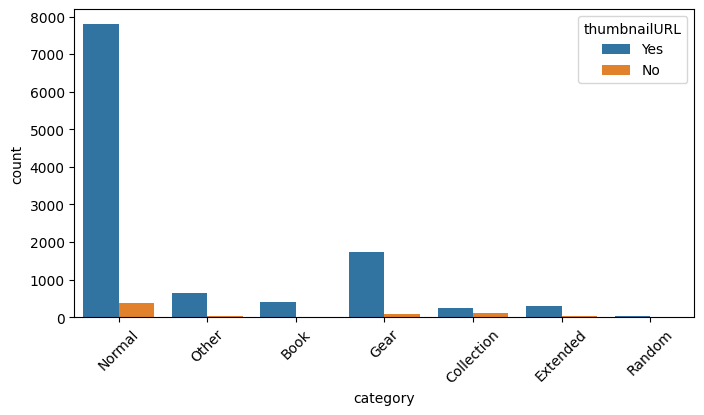

In [ ]:
plt.figure(figsize=(8, 4))
s1=sns.countplot(new_train_, x=target_feature, hue='thumbnailURL')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

<ipython-input-34-25d180e2723d>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s1.set_xticklabels(s1.get_xticklabels(),rotation=45)


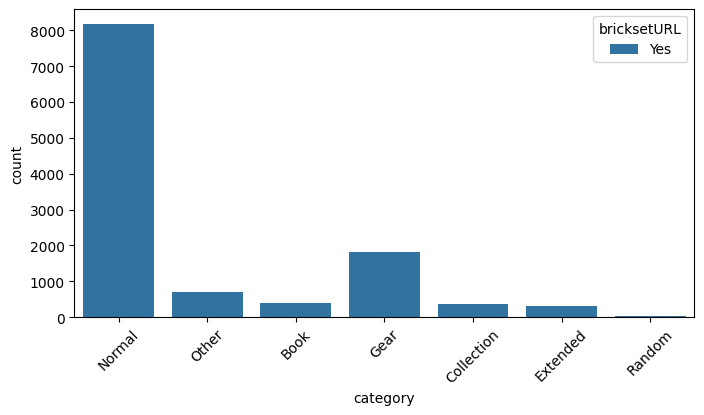

In [ ]:
plt.figure(figsize=(8, 4))
s1=sns.countplot(new_train_, x=target_feature, hue='bricksetURL')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

<ipython-input-35-da883c918639>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s1.set_xticklabels(s1.get_xticklabels(),rotation=45)


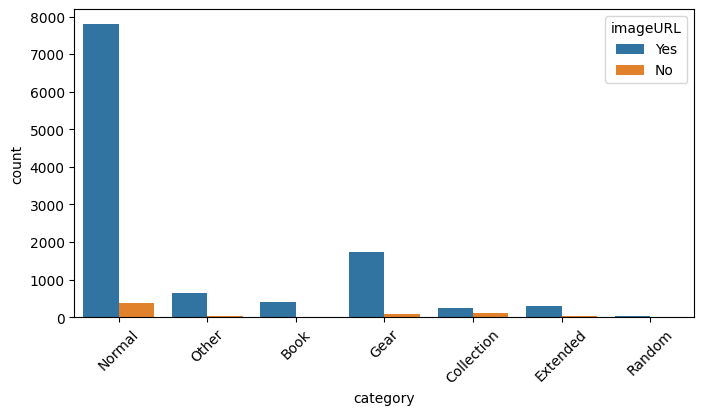

In [ ]:
plt.figure(figsize=(8, 4))
s1=sns.countplot(new_train_, x=target_feature, hue='imageURL')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Veamos cómo se comportan los datos del tema y el número de piezas:

<ipython-input-36-b2a4437ae59c>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s1.set_xticklabels(s1.get_xticklabels(),rotation=45)


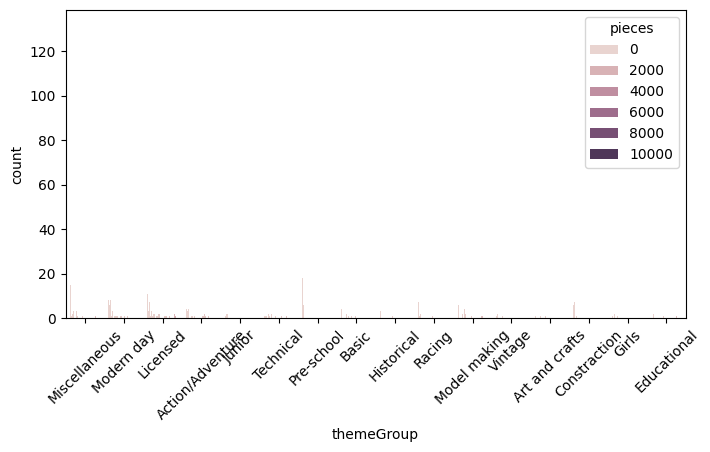

In [ ]:
plt.figure(figsize=(8, 4))
s1=sns.countplot(new_train_, x="themeGroup", hue='pieces')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

La correlación entre las variables categóricas, esto puede obtenerse mediante una matriz de Creamer.

In [ ]:
#import scipy.stats as stats

def cramers_v(x, y):
  """Calcula la correlación de Cramer’s V entre dos variables categóricas."""
  confusion_matrix = pd.crosstab(x, y)  # Tabla de contingencia
  chi2 = stats.chi2_contingency(confusion_matrix)[0]  # Estadístico Chi-cuadrado
  n = confusion_matrix.sum().sum()  # Total de observaciones
  r, k = confusion_matrix.shape  # Dimensiones de la tabla
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))  # Fórmula de Cramer’s V

def cramer_v_matrix(df):
  cat_cols = df.select_dtypes(include=['object', 'category']).columns
  matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

  for col1 in cat_cols:
    for col2 in cat_cols:
      if col1 == col2:
        matrix.loc[col1, col2] = 1.0  # Autocorrelación perfecta
      else:
        matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

  return matrix.astype(float)

In [ ]:
correlation_matrix = cramer_v_matrix(new_train)

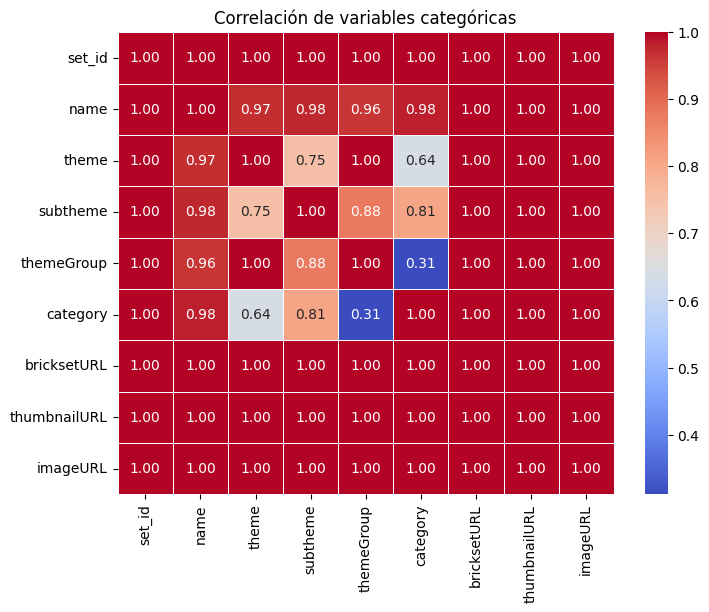

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)  # Mapa de calor
plt.title("Correlación de variables categóricas")
plt.show()

## 2.5. Insights obtenidos de la información.

Los datos tienen un total de 14 variables o características, un total de 11.812 instancias. No tiene instancias (filas) duplicadas.
Los tipos de datos para las variables se distribuyen de la siguiente forma:
* 7 texto.
* 5 numéricas.
* 2 categóricas.


Las recomendaciones de tratamiento de la información para cada una de las características, son las siguientes:

| ATRIBUTO | PROPUESTA |
| :- | :-|
| **set_id** | Todos sus valores son únicos al ser el identificador de cada producto, la cardinalidad es muy alta. No presenta ausencias. Se recomienda eliminar esta característica.|
| **name** | El 86% de sus valores son únicos correspondientes a 10.203 categorías, lo que indica una alta cardinalidad de la variable. No presenta ausencias. Se recomienda eliminar esta característica. |
| **year** | Los datos oscilan entre 1970 y 2022, tiene tendencia al alza conforme avanza el tiempo y el último año es el que cuenta con más información.|
| **theme** | El 1.3% de su información es única, aunque su porcentaje parece bajo corresponde a un total de 151 valores únicos, lo cuál indica alta cardinalidad, no obstante, el tema es un valor relevante al que podemos darle manejo con un LabelEncoder para asignar un valor a cada categoría, sin que un mayor o menor valor tenga una relevancia, únicamente con el objetivo de codificar la información.|
| **subtheme** | El 9% de sus datos son valores únicos, al igual que el tema parece un porcentaje bajo pero corresponde a 854 valores únicos. Cuenta además con 19.6% de ausencias. Por los anteriores comportamientos se recomienda eliminar esta característica.|
| **themeGroup** | Cuenta con 0.1% de datos únicos correspondientes a 16 categorías, no presenta ausencias, esta categorización es relevante para el modelo, se recomienda transformar la variable. |
| **pieces** | Cuenta con un 12.8% de datos únicos que corresponden a un total de 1188 valores únicos, sus ausencias suman un total de 21.8%, se recomienda imputar la información. Llama la atención el rango de la variable, dado que hay algunos valores posiblemente atípicos superando las 5544 piezas, al consultar la organización indican que hay productos que pueden tener esta cantidad de valores, por lo tanto, mantendremos esta característica.|
| **minifigs** | Característica numérica con un valor alto de ausencias con un total de 54.6%, podría imputarse pero no se recomienda dado que dependería de menos de la mitad de la información para lograrlo, podríamos generar un sesgo. |
| **agerange_min** | Característica numérica también con un valor alto de ausencias con un total de 63.5% de los datos, al igual que minifigs no se recomienda imputar, una mejor decisión sería eliminar esta característica. |
| **US_retailPrice** | El precio a priori sería una variable importante para el modelo, pero al observar el porcentaje alto de ausencias con un 62.2%, se recomienda eliminar esta característica. |
| **bricksetURL** | Todos sus valores son únicos y no presenta ausencias.
| **thumbnailURL** | El 99.9% de sus datos son únicos y presenta un 5.4% de ausencias en la variable. |
| **imageURL** | El 99.9% de sus datos son únicos y presenta también un 5.4 de ausencias en la variable. |
| **category** | El 0.1% de datos son únicos y corresponden a un total de 7 categorías, la clase predominante es el valor `normal` con un 69.3%, no presenta ausencias.|

En resúmen:

Variables a eliminar:

* set_id
* name
* subtheme
* agerange_min
* US_retailPrice
* bricksetURL
* thumbnailURL
* imageURL
* minifigs

Variables numéricas:

* year.
* pieces. Requiere una función de imputación para los valores ausentes.

Variables categóricas o de texto:

* theme: Aplicaremos un LabelEncoder.
* themeGroup: Aplicaremos un OneHotEncoder para las 16 categorías.

Esto nos generaría un modelo de 19 variables.


## 2.6. Preparación de la información.

Generamos una copia de los conjuntos de datos:

In [ ]:
new_train_ = new_train.copy()
new_val_ = val.copy()
new_test_ = test.copy()

De acuerdo con todo el análisis exploratorio, procedemos en primera instancia a definir las características que serán eliminadas y la eliminación de los valores ausentes:

In [ ]:
#Características a eliminar

#Variables categóricas
drop_cat_fields = [ "set_id", "name", "subtheme", "thumbnailURL", "bricksetURL", "imageURL" ]
#Variables numéricas
drop_num_fields = [ "minifigs", "US_retailPrice", "agerange_min" ]

#Todas las columnas a eliminar
drop_fields = drop_cat_fields + drop_num_fields
drop_fields

['set_id',
 'name',
 'subtheme',
 'thumbnailURL',
 'bricksetURL',
 'imageURL',
 'minifigs',
 'US_retailPrice',
 'agerange_min']

Generamos funciones para el borrado de las columnas y eliminación de valores ausentes:

In [ ]:
#Función de borrado de features no usados
def drop_features(train_, val_, test_, features):
  train_ = train_.drop(features, axis=1)
  val_ = val_.drop(features, axis=1)
  test_ = test_.drop(features, axis=1)

  return train_, val_, test_

def drop_duplicates(train_, val_, test_):
  train_temp = train_.copy()
  val_temp = val_.copy()
  test_temp = test_.copy()
  print(f"El número de registros antes de borrar duplicados es:")
  print(f"Train: {train_temp.shape[0]}")
  print(f"Validation: {val_temp.shape[0]}")
  print(f"Test: {test_temp.shape[0]}")
  train_ = train_temp.drop_duplicates()
  val_ = val_temp.drop_duplicates()
  test_ = test_temp.drop_duplicates()
  print("-----")
  print(f"El número de registros después de borrar duplicados es:")
  print(f"Train: {train_.shape[0]}")
  print(f"Validation: {val_.shape[0]}")
  print(f"Test: {test_.shape[0]}")

  return train_, val_, test_

In [ ]:
#Ejecutamos las funciones de limpieza de la información
new_train_, new_val_, new_test_ = drop_features(new_train_, new_val_, new_test_, drop_fields)
new_train_, new_val_, new_test_ = drop_duplicates(new_train_ ,new_val_, new_test_)

El número de registros antes de borrar duplicados es:
Train: 11812
Validation: 2953
Test: 3692
-----
El número de registros después de borrar duplicados es:
Train: 8295
Validation: 2283
Test: 2868


In [ ]:
print(f"El número de características (features) ahora es: {new_train_.shape[1]}")

El número de características (features) ahora es: 5


Procedemos a verificar los tipos de datos con miras a generar los Pipeline:

Compilamos los nombres de las características numéricas en una sola variable:

In [ ]:
num_fields = new_train_.select_dtypes(include=[np.number]).columns.tolist()
#num_fields = np.unique(str_to_num_fields + bool_to_num_fields + date_to_num_fields + num_fields).tolist()
num_fields

['year', 'pieces']

Hacemos ahora lo mismo para las numéricas:

In [ ]:
cat_fields = new_train_.select_dtypes(exclude=[np.number]).columns.tolist()
#cat_fields = np.unique(str_to_num_fields + bool_to_num_fields + date_to_num_fields + num_fields).tolist()
cat_fields

['theme', 'themeGroup', 'category']

Generamos una función para la imputación de los valores del número de piezas (pieces).

In [ ]:
def impute_by_theme(X):
  df_temp = X.copy()
  themes = df_temp.groupby('themeGroup')['pieces'].transform("median")
  #df_temp['pieces'] = df_temp['pieces'].fillna(themes)
  df_temp['pieces'] = df_temp['pieces'].fillna(
    df_temp.groupby('themeGroup')['pieces'].transform('median')
  )
  #df_temp['pieces'] = df_temp['pieces'].fillna(new_train_['pieces'].median())
  print(df_temp[['pieces']])
  return df_temp[['pieces']]
  #return df_temp

In [ ]:
def encode_column(X):
    le = LabelEncoder()
    #return le.fit_transform(X.ravel()).reshape(-1, 1)
    return le.fit_transform(X.iloc[:, 0]).reshape(-1, 1)

* ¿Qué crees que pasó? ¿Por qué los rendimientos son tan diferentes?
* ¿Hay desbalanceo de datos? ¿Como harías para combatirlo?
* ¿Por qué crees que los rendimientos no son buenos? ¿Tendrá que ver la forma en como entrenamos?, ¿nos falta alguna decisión para el tratamiento de datos?